In [1]:
import numpy as np
import scipy
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
wav_file = 'CantinaBand60.wav'

In [3]:
sample_rate, X = wavfile.read(wav_file)

In [4]:
str(sample_rate) + " Hz"

'22050 Hz'

<body>X refers to the data in the given signal</body>

In [5]:
X

array([   3,    7,    0, ..., -895, -980, -802], dtype=int16)

In [6]:
X.shape

(1323000,)

In [7]:
duration_s = X.shape[0] / sample_rate
print("The .wav file is for {} s duration".format(duration_s))

The .wav file is for 60.0 s duration


In [8]:
window_size = 1024 #defining the sample frequency
percent_overlap = 0.0
N_overlap = np.ceil(window_size*percent_overlap)
N_overlap

0.0

In [9]:
secs_per_img = 2

In [10]:
window = signal.windows.tukey(window_size, alpha=0.4)
window

array([0.00000000e+00, 5.89413342e-05, 2.35751441e-04, ...,
       2.35751441e-04, 5.89413342e-05, 0.00000000e+00])

(0.0, 1024.0, 0.0, 1.03)

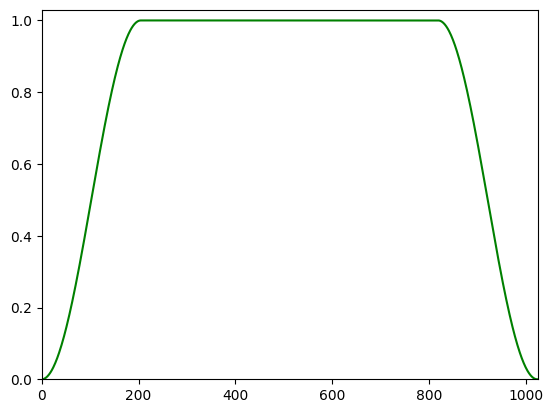

In [11]:
plt.plot(window, "g-")
plt.axis([0,1024, 0,1.03])

In [12]:
F, T, S_mag = signal.spectrogram(X, sample_rate, scaling="spectrum", mode="magnitude",window=window, noverlap=N_overlap) 

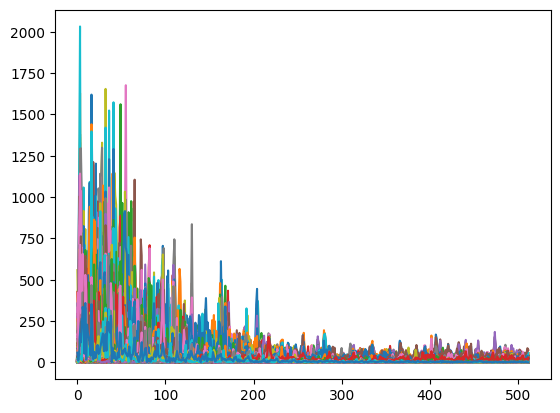

In [14]:
plt.plot(S_mag)
plt.show()

In [15]:
time_resolution = np.floor(len(T)/duration_s)
time_resolution

21.0

In [16]:
seconds_per_window = window_size/sample_rate
seconds_per_window

0.046439909297052155

In [17]:
S_mag.shape

(513, 1291)

In [18]:
dt = 1
dt_secs = dt/time_resolution
dt_secs

0.047619047619047616

In [19]:
time_resolution = np.floor(len(T)/duration_s)
seconds_per_window = window_size/sample_rate

In [20]:
time_resolution

21.0

In [21]:
img_width = np.argmin(np.abs(secs_per_img-T))+1
img_width

44

In [22]:
f_max = 4000
f_min = 0
f_max_idx = np.argmin(np.abs(f_max-F))+1
f_min_idx = np.argmin(np.abs(f_min-F))

In [24]:
S_mag_crop = S_mag[f_min_idx:f_max_idx+f_min_idx, :]

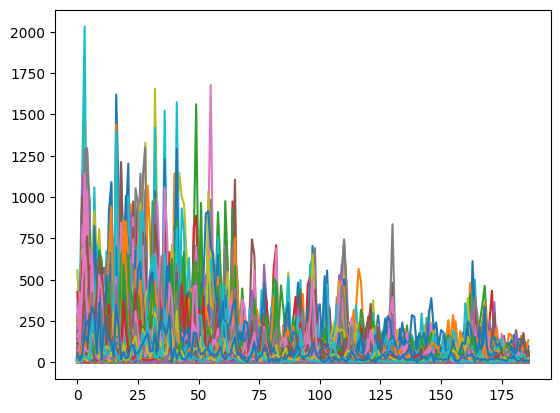

In [25]:
plt.plot(S_mag_crop)
plt.show()

In [35]:
img_height = S_mag_crop.shape[0]
img_height
F_crop = F[f_min_idx:f_max_idx+f_min_idx]

In [36]:
if img_width % 2 == 1:
    img_width +=1

In [37]:
img_width

44

In [38]:
img_size = (img_width, img_height)
assert img_width == img_width and img_height == img_height, "Input image dimensions will cause shape error in decoder"

In [39]:
np.savez(outfile, F=F_crop, T=T, S_mag=S_mag_crop, dt=dt, img_width=img_width, img_height=img_height, time_resolution=time_resolution)

In [33]:
outfile = 'savefile.npz'

In [41]:
vars = np.load(outfile)

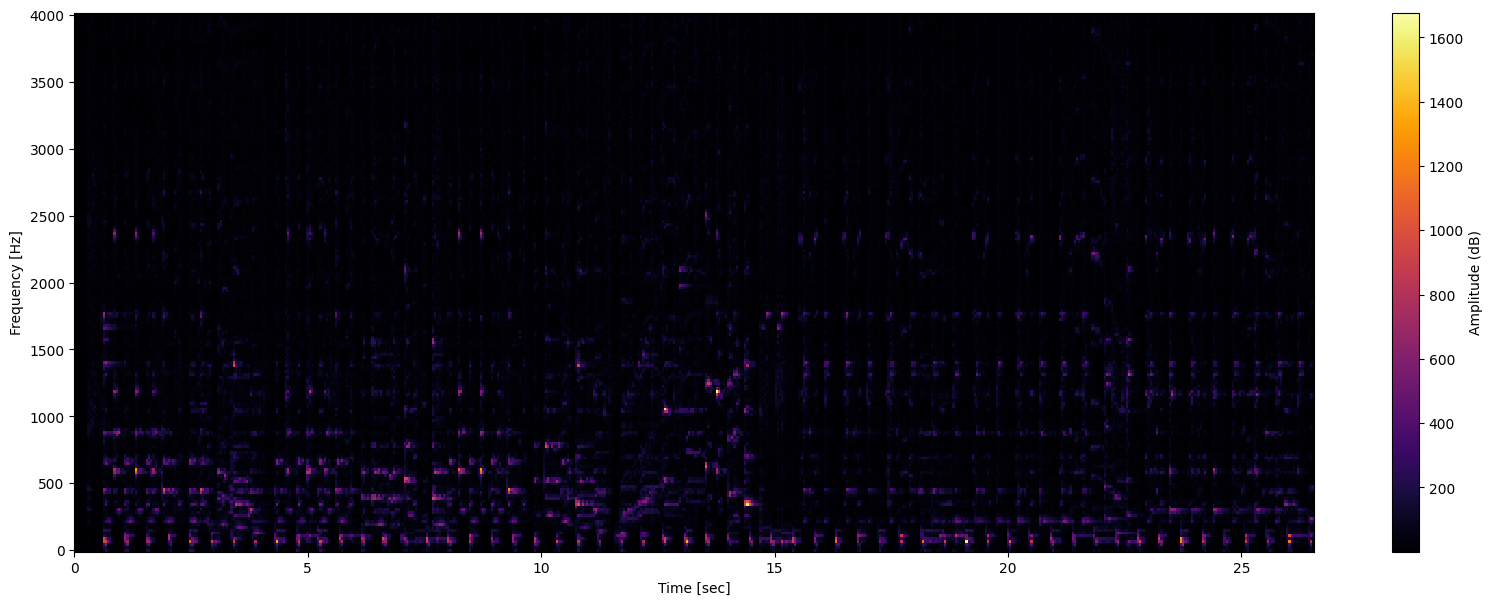

In [44]:
c = 13
plt.figure(figsize=(20, 7))
ax = plt.axes()
plt.pcolormesh(T[:img_width*c], F_crop[:img_height], S_mag_crop[:img_height, :img_width*c], shading='nearest', cmap='inferno')
ax.set_yscale('linear')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar(ax=ax)
cbar.set_label('Amplitude (dB)')
plt.show()